In [1]:
import pylab as plt 
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
from plotting_utils import add_earth

In [3]:
def plot(df_sub, fname=None):
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    cmap = plt.get_cmap('viridis')
    for i in range(50, 500, 50):
        plt.scatter(df_sub[f'x{i}'], df_sub[f'z{i}'], c=cmap(np.linspace(0, 1, len(df_sub.index))))

    plt.xlabel('X (SM)')
    plt.ylabel('Z (SM)')
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    plt.xlim(-1, 7)
    plt.ylim(-3, 3)
    add_earth()
    plt.gca().set_aspect("equal")
        
    plt.subplot(122)
    cmap = plt.get_cmap('viridis')
    for i in range(50, 500, 50):
        plt.scatter(df_sub[f'x{i}'], df_sub[f'y{i}'], c=cmap(np.linspace(0, 1, len(df_sub.index))))

    plt.xlabel('X (SM)')
    plt.ylabel('Y (SM)')
    plt.xlim(-1, 7)
    plt.ylim(-7, 7)
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    add_earth()
    plt.gca().set_aspect("equal")
    
    if fname:
        plt.savefig(fname)
        plt.close()


In [4]:
df = pd.read_csv('data/test_dipole.csv')
print(len(df.index))

5000


In [5]:
df.head()

,Unnamed: 0,t0,x0,y0,z0,vpar0,B0,W0,t50,x50,...,vpar400,B400,W400,t450,x450,y450,z450,vpar450,B450,W450
0,0,47.003411,2.998573,0.001991,0.009922,0.000210,-0.012023,5.012435e-07,47.003411,3.498771,...,0.000213,-0.00107,6.521205e-08,47.003411,7.499410,0.001685,0.009986,0.000213,-0.000871,5.729887e-08
1,1,94.006823,2.997145,0.003797,0.019695,0.000206,-0.013216,5.480680e-07,94.006823,3.497537,...,0.000213,-0.00107,6.520714e-08,94.006823,7.498820,0.003370,0.019971,0.000213,-0.000871,5.729564e-08
2,2,141.010234,2.995739,0.005599,0.029320,0.000203,-0.013221,5.476246e-07,141.010234,3.496313,...,0.000213,-0.00107,6.520284e-08,141.010234,7.498231,0.005054,0.029954,0.000213,-0.000871,5.729289e-08
3,3,188.013645,2.994355,0.007399,0.038797,0.000200,-0.013227,5.472093e-07,188.013645,3.495098,...,0.000213,-0.00107,6.519917e-08,188.013645,7.497642,0.006739,0.039935,0.000213,-0.000871,5.729061e-08
4,4,235.017057,2.992992,0.009195,0.048126,0.000197,-0.013233,5.468209e-07,235.017057,3.493892,...,0.000212,-0.00107,6.519609e-08,235.017057,7.497054,0.008422,0.049915,0.000213,-0.000871,5.728881e-08


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Conservation of Energy of Particle Tracer')

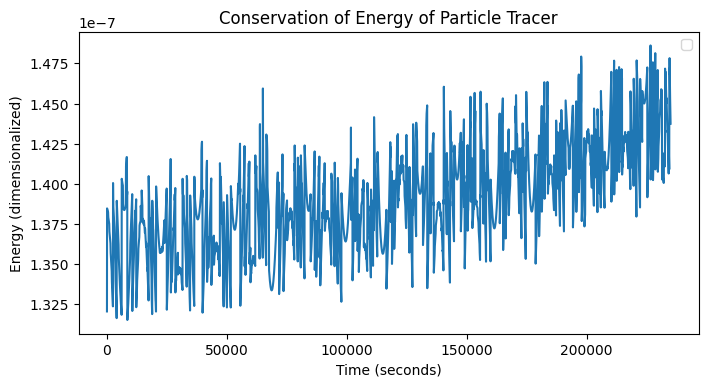

In [6]:
from astropy.constants import R_earth, m_e, c
from astropy import units


B_units = units.s / units.km
M_units = units.km / units.s

t = df['t200'].values
W = df['W200'].values 

plt.figure(figsize=(8, 4), dpi=100, facecolor='white')
plt.plot(t, W)
plt.legend()
plt.ylabel('Energy (dimensionalized)')
plt.xlabel('Time (seconds)')
plt.title('Conservation of Energy of Particle Tracer')

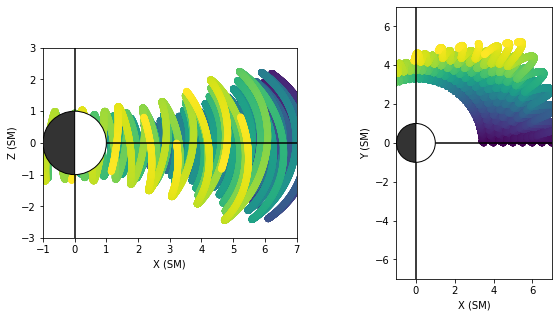

In [7]:
plot(df)

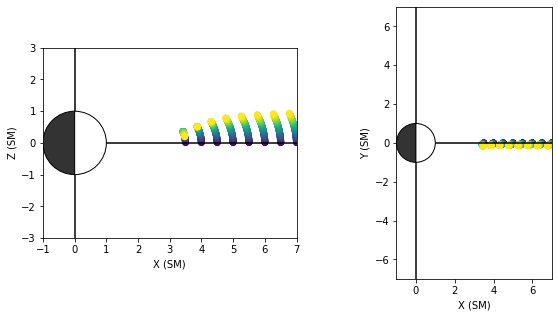

In [26]:
plot(df.iloc[:100])

In [9]:
import joblib
tasks = []

for i in range(len(df.index)):
    tasks.append(joblib.delayed(plot)(df.iloc[i:i+100], 'plots/%04d.png' % i))
    
print(f'Tasks: {len(tasks)}')

joblib.Parallel(n_jobs=-1, verbose=1)(tasks)

Tasks: 5000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 10.5min finished


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,